import the proper library

In [1]:
import pandas as pd
import numpy as np

create a dataset

In [2]:
dataset = pd.DataFrame()

create a variable

In [3]:
dataset['x'] = np.random.random(100)

show the header of your data frame

In [4]:
dataset.head()

,x
0,0.659764
1,0.963813
2,0.618544
3,0.754153
4,0.905070


In [5]:
dataset['x'].values.shape

(100,)

show the tail of the dataset

In [6]:
dataset.tail()

,x
95,0.306447
96,0.890356
97,0.783747
98,0.585809
99,0.391964


create another variable

In [7]:
dataset['y'] = np.random.random(100)

In [8]:
dataset.head()

,x,y
0,0.659764,0.113402
1,0.963813,0.747725
2,0.618544,0.983082
3,0.754153,0.809887
4,0.905070,0.845165


make an operation on variables

In [9]:
dataset['z'] = dataset['x'] + np.log(dataset['y'])

In [10]:
dataset.head()

,x,y,z
0,0.659764,0.113402,-1.517054
1,0.963813,0.747725,0.673092
2,0.618544,0.983082,0.601482
3,0.754153,0.809887,0.543292
4,0.905070,0.845165,0.736846


Create sub data from the table

In [11]:
dataset.shape

(100, 3)

In [12]:
sub_data = dataset[['x','z']].values

In [13]:
sub_data.shape

(100, 2)

In [14]:
last_column = dataset.values[:,-1]

Apply some selections

In [15]:
selection = np.where( dataset.values[:,0] > 0.5)
values = dataset.values[selection]

In [16]:
values.shape

(58, 3)

Calculate percentile

In [17]:
bins = np.percentile(values, [20, 40, 60, 80])
bins

array([ 0.13718337,  0.50817775,  0.62030676,  0.79726469])

save it to disk

In [18]:
dataset.to_hdf('mydataset.hdf5','data')

reopen the dataset

In [19]:
store = pd.io.pytables.HDFStore('mydataset.hdf5')
newdataset = store['data']

In [20]:
newdataset.head()

,x,y,z
0,0.659764,0.113402,-1.517054
1,0.963813,0.747725,0.673092
2,0.618544,0.983082,0.601482
3,0.754153,0.809887,0.543292
4,0.905070,0.845165,0.736846


http://pandas.pydata.org/

Fancy a little root file 

## newer version of root is causing problem with root_numpy installation

In [21]:
import root_numpy

Welcome to ROOTaaS 6.06/04


In [22]:
root_numpy.array2root(dataset.to_records(), 'example.root', treename='data', mode='recreate')

In [23]:
root_data = root_numpy.root2array('example.root', treename='data', branches=['x', 'y','z'], 
                                  selection='x > 0.2')

In [24]:
root_frame = pd.DataFrame(root_data)

In [25]:
root_frame.head()

,x,y,z
0,0.588253,0.686762,0.212486
1,0.806773,0.231761,-0.655274
2,0.940489,0.102007,-1.342225
3,0.811004,0.479764,0.076544
4,0.345207,0.728983,0.029103


In [26]:
import ROOT

In [27]:
rf = ROOT.TFile.Open('example.root')

In [28]:
rt = rf.Get('data')

In [29]:
rt.Draw('x:y')

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [30]:
rt.Scan('x:y')

100L

************************************
*    Row   *         x *         y *
************************************
*        0 * 0.5882527 * 0.6867623 *
*        1 * 0.8067732 * 0.2317613 *
*        2 * 0.9404887 * 0.1020070 *
*        3 * 0.8110039 * 0.4797643 *
*        4 * 0.3452067 * 0.7289834 *
*        5 * 0.5228765 * 0.9005700 *
*        6 * 0.3993071 * 0.4865308 *
*        7 * 0.9056273 * 0.1610542 *
*        8 * 0.7047362 * 0.0010886 *
*        9 * 0.4092739 * 0.0559971 *
*       10 * 0.0218082 * 0.3854409 *
*       11 * 0.8687878 * 0.6902491 *
*       12 * 0.7483836 * 0.5871596 *
*       13 * 0.9559283 * 0.1402250 *
*       14 * 0.0635142 * 0.7486877 *
*       15 * 0.2121299 * 0.0311492 *
*       16 * 0.1803885 * 0.0167031 *
*       17 * 0.5858465 * 0.4222700 *
*       18 * 0.2560627 * 0.2419947 *
*       19 * 0.6177526 * 0.7025380 *
*       20 * 0.4631056 * 0.3651359 *
*       21 * 0.2663720 * 0.1587541 *
*       22 * 0.1008671 * 0.3708343 *
*       23 * 0.6708787 * 0.1404795 *
*

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> 

In [31]:
h = ROOT.TH1F("gauss","Example histogram",100,-4,4)
h.FillRandom("gaus")

In [32]:


c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
h.Draw()



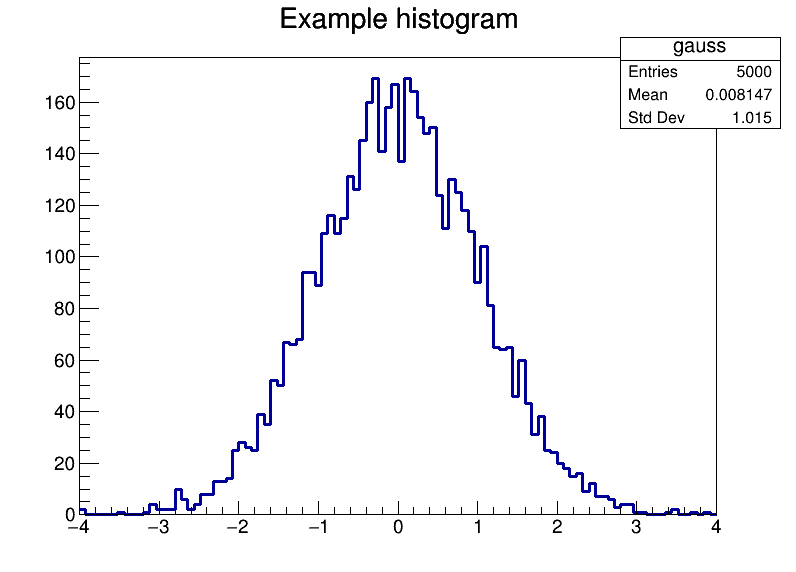

In [33]:
c.Draw()